# 1. 범주형 특성의 원핫인코딩 
### (One Hot Encoding)

## 1-1. 데이터 범주-연속-레이블로 나누기

In [ ]:
# 그냥 코드 복사
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/vote.csv', encoding='utf-8')

In [ ]:
data.head()

,gender,region,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,1,4,3,3,3,2,2,4.0,1,2
1,1,5,2,3,3,2,4,3.0,0,3
2,1,3,1,2,4,1,3,2.8,1,4
3,2,1,2,1,3,5,4,2.6,1,1
4,1,1,1,2,4,4,3,2.4,1,1


In [ ]:
X1=data[['gender', 'region']] # 중괄호 2개, X1 = 범주형

In [ ]:
X1.head()

,gender,region
0,1,4
1,1,5
2,1,3
3,2,1
4,1,1


In [ ]:
X2=data[['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']] # 연속형, 실수형 변수

In [ ]:
X2.head()

,edu,income,age,score_gov,score_progress,score_intention
0,3,3,3,2,2,4.0
1,2,3,3,2,4,3.0
2,1,2,4,1,3,2.8
3,2,1,3,5,4,2.6
4,1,2,4,4,3,2.4


In [ ]:
y = data[['vote', 'parties']]

In [ ]:
y.head()

,vote,parties
0,1,2
1,0,3
2,1,4
3,1,1
4,1,1


## 1-2. 범주형 특성의 웟핫인코딩 변환

In [ ]:
X1['gender'] = X1['gender'].replace([1,2], ['male', 'female'])
# 변수명 replace로 바꾸기, 1=male, 2=female

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X1.head()

,gender,region
0,male,4
1,male,5
2,male,3
3,female,1
4,male,1


In [ ]:
X1['region'] = X1['region'].replace([1,2,3,4,5], ['Sudo', 'Chungcheung', 'Honam', 'Youngnam', 'Others'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X1.head()

,gender,region
0,male,Youngnam
1,male,Others
2,male,Honam
3,female,Sudo
4,male,Sudo


In [ ]:
X1.info() # 수치형이 아닌 경우 object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   gender  211 non-null    object
 1   region  211 non-null    object
dtypes: object(2)
memory usage: 3.4+ KB


In [ ]:
# One-hot Encoding
X1_dum=pd.get_dummies(X1)

In [ ]:
X1_dum.head()
# One-hot Encoding 결과 확인
# X1_dum은 범주형 데이터인 gender, region을 포함하는 X1을 One-hot Encoding한 결과로 저장

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam
0,0,1,0,0,0,0,1
1,0,1,0,0,1,0,0
2,0,1,0,1,0,0,0
3,1,0,0,0,0,1,0
4,0,1,0,0,0,1,0


# 2. 연속형 특성의 Scaling

In [ ]:
# 연속형 데이터는 X2에 분리하여 저장
X2.describe() # 수치형, 연속형

,edu,income,age,score_gov,score_progress,score_intention
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,1.867299,2.208531,2.654028,3.056872,3.094787,2.910900
std,0.625963,1.066424,0.872173,0.944451,0.961408,0.725078
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,2.000000,3.000000,2.000000,2.400000
50%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000
75%,2.000000,3.000000,3.000000,4.000000,4.000000,3.400000
max,3.000000,4.000000,4.000000,5.000000,5.000000,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f202da7a310>,
      dtype=object)

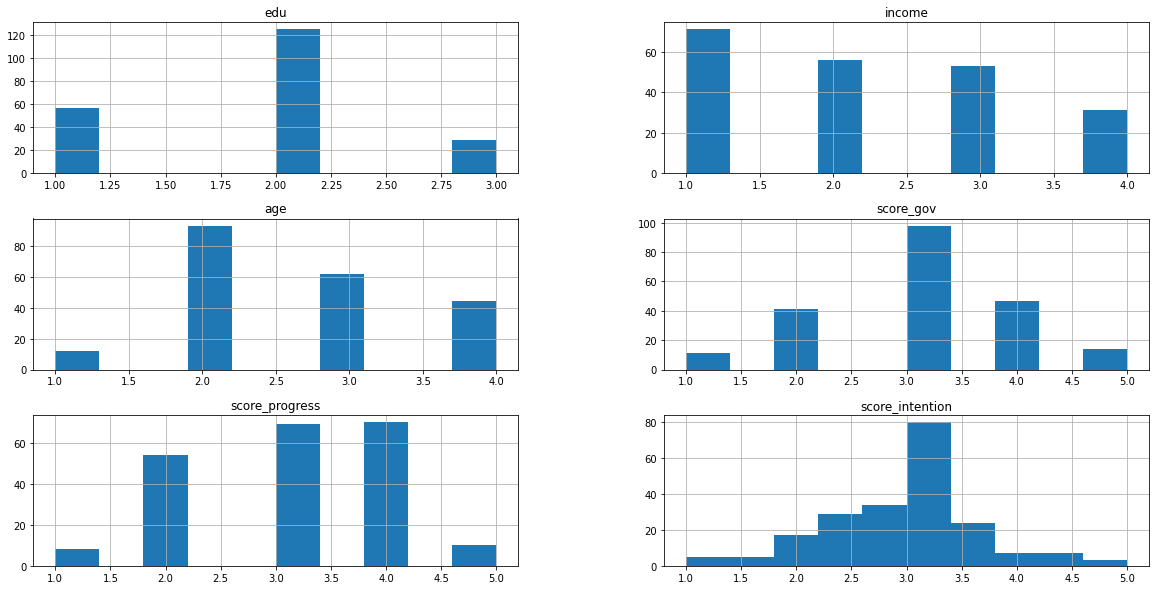

In [ ]:
# 그래프 출력(시각화) : 연속형 데이터 상태 확인
import matplotlib.pyplot as plt
pd.DataFrame(X2).hist(figsize=(20,10))

## 2-1. Min-Max 스케일링

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler1=MinMaxScaler() # 편의성을 위해 이름 지정

In [ ]:
scaler1.fit(X2)

MinMaxScaler()

In [ ]:
# 연속형 데이터 X2에 대해 min-max scaling으로 변환
# MIn-Max scaling 이름 X_scaled1
X_scaled1=scaler1.transform(X2)

In [ ]:
# 리스트 형태의 데이터를 Pandas 데이터프레임으로 변환
pd.DataFrame(X_scaled1).head()
# 스케일링 하면 칼럼명 사라짐

,0,1,2,3,4,5
0,1.0,0.666667,0.666667,0.25,0.25,0.75
1,0.5,0.666667,0.666667,0.25,0.75,0.50
2,0.0,0.333333,1.000000,0.00,0.50,0.45
3,0.5,0.000000,0.666667,1.00,0.75,0.40
4,0.0,0.333333,1.000000,0.75,0.50,0.35


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20215a9b90>,
      dtype=object)

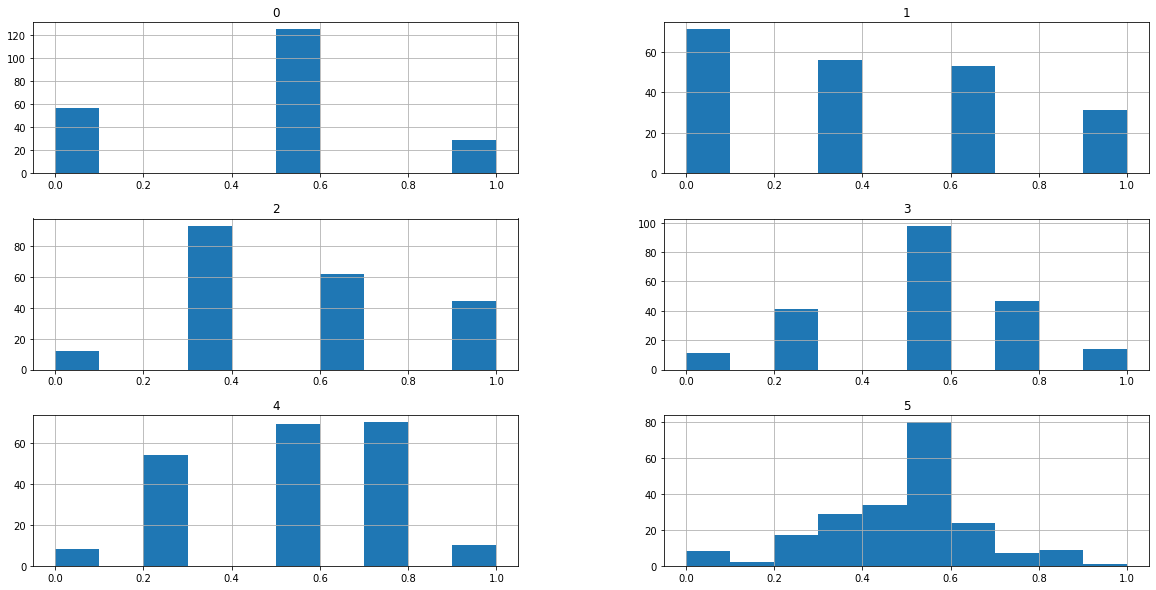

In [ ]:
pd.DataFrame(X_scaled1).hist(figsize=(20,10))
# 왼쪽 끝 0, 오른쪽 끝 1로 맞춰짐

In [ ]:
pd.DataFrame(X_scaled1).describe()
# 최소 0, 최대 1

,0,1,2,3,4,5
count,211.000000,211.000000,211.000000,211.000000,211.000000,211.000000
mean,0.433649,0.402844,0.551343,0.514218,0.523697,0.477725
std,0.312982,0.355475,0.290724,0.236113,0.240352,0.181269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.333333,0.500000,0.250000,0.350000
50%,0.500000,0.333333,0.666667,0.500000,0.500000,0.500000
75%,0.500000,0.666667,0.666667,0.750000,0.750000,0.600000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2-2. Standardization 스케일링

In [ ]:
# Min-Max와 방법은 동일, 결과는 다름
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler2=StandardScaler()

In [ ]:
scaler2.fit(X2)

StandardScaler()

In [ ]:
X_scaled2=scaler2.transform(X2)

In [ ]:
pd.DataFrame(X_scaled2).describe()

,0,1,2,3,4,5
count,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02,2.110000e+02
mean,5.051252e-17,3.367501e-17,1.683751e-16,-1.557469e-16,-9.681566e-17,-2.188876e-16
std,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00,1.002378e+00
min,-1.388837e+00,-1.135950e+00,-1.900955e+00,-2.183028e+00,-2.184055e+00,-2.641710e+00
25%,-1.388837e+00,-1.135950e+00,-7.516670e-01,-6.036022e-02,-1.141440e+00,-7.062904e-01
50%,2.124996e-01,-1.960071e-01,3.976209e-01,-6.036022e-02,-9.882600e-02,1.231749e-01
75%,2.124996e-01,7.439362e-01,3.976209e-01,1.000974e+00,9.437883e-01,6.761518e-01
max,1.813836e+00,1.683879e+00,1.546909e+00,2.062307e+00,1.986403e+00,2.888059e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f20212f6050>,
      dtype=object)

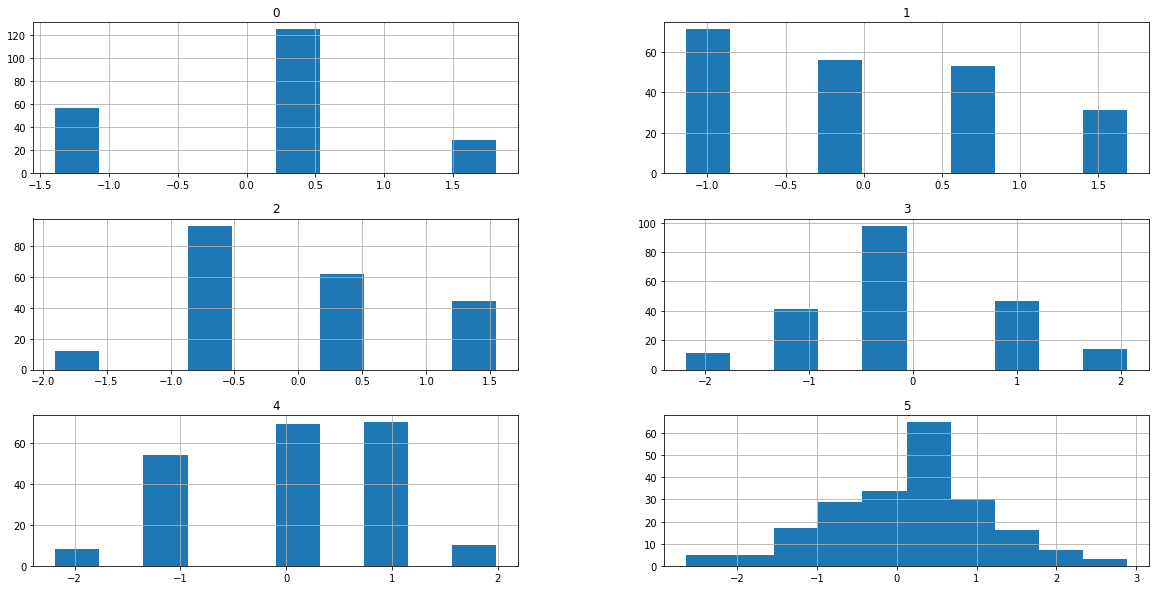

In [ ]:
pd.DataFrame(X_scaled2).hist(figsize=(20,10))
# 평균과 표준편차 포함하는 결과

# 3. 자료 통합 및 저장하기

In [ ]:
import pandas as pd

In [ ]:
X_scaled=pd.DataFrame(X_scaled1)

In [ ]:
# 칼럼명 원래대로 추가
X_scaled.columns=['edu', 'income', 'age', 'score_gov', 'score_progress', 'score_intention']

In [ ]:
# 범주형 데이터(One-hot Encoding) + 연속형 데이터(min-max scaling) + 레이블
Fvote=pd.concat([X1_dum, X_scaled, y], axis=1)

In [ ]:
Fvote.head()
# 연속형은 min-max scaling으로 추가됨

,gender_female,gender_male,region_Chungcheung,region_Honam,region_Others,region_Sudo,region_Youngnam,edu,income,age,score_gov,score_progress,score_intention,vote,parties
0,0,1,0,0,0,0,1,1.0,0.666667,0.666667,0.25,0.25,0.75,1,2
1,0,1,0,0,1,0,0,0.5,0.666667,0.666667,0.25,0.75,0.50,0,3
2,0,1,0,1,0,0,0,0.0,0.333333,1.000000,0.00,0.50,0.45,1,4
3,1,0,0,0,0,1,0,0.5,0.000000,0.666667,1.00,0.75,0.40,1,1
4,0,1,0,0,0,1,0,0.0,0.333333,1.000000,0.75,0.50,0.35,1,1


In [ ]:
Fvote.to_csv('/content/drive/MyDrive/Colab Notebooks/MachineLearning/data/Fvote.csv', sep=',', encoding='utf-8')
# csv는 ,로 구분됨